In [2]:
#Craft a story from a dataset

In [3]:
#imports
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import nltk
import os
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')

import texthero as hero

# Show plots inline
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
mpl.style.reload_library()
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

#plotly and kaleido
import plotly.express as px


In [4]:
#nltk.download('punkt')
#!pip install gensim==4.2.0
#!pip install texthero==1.0.5
#!pip install unidecode
#!pip install plotly
#!!pip install -U kaleido

I worked in natural wine for a couple of years and thought I would use the wine data set on Kaggle. It is tasting notes and wine information scraped from the magazine, Wine Enthusiast on November 22, 2017. In the notes on the data set, the compiler said that she just watched the film Somm and was looking to make program that could predict the wine varietal, location of origin, year, or other features based on tasting points that a somm would generate upon tasting the wine. So I downloaded the data set and watched Somm.

I know from working in wine that many tasting notes are particular to specific varietals, bell pepper means Cabernet Franc, green apple indicates a Chenin, and once at a Brumaire festival in Oakland, while tasting two glasses from the same vineyard, the same mountain, the same varietal, raised on opposite sides a mountain, I looked at the winemaker and asked, "Does one side of the mountain face the sea?" He was astonished. But differences in climate make a tastable difference in wine, not through imagined qualities of "salty minerality" but by reducing the sugars stored in fruit when the plant goes through more or less  photosynthesis. In some cases it does seem to me that some of the indefinable, experiential qualities of a wine could be defined, calculated, and used to identify wines. 

Indeed, there is plenty of research that goes into making wine. A fact sheet about a specific wine does not, thankfully, include information on the brix, measurements of the sugar levels of the grapes up to harvest. Nor does it include information about the temperatures during fermentation, or how long it took the fermentation process to start or how long it lasted, I count my blessings. But in the same way that tasting bell pepper usually means you're drinking a Cab or higher levels of acidity might indicate cooler climates, some of these tidbits of information are sign posts to additional details about the wine. Knowing what material the wine was fermented in will tell you plenty about the oxidation level of the wine and the tastable level of tannins. Knowing how tannins mature over fermentation and bottling can reveal information about the age of a wine. All of the different pieces of the puzzle have to harmonize together in order to produce a good wine. 

I'll open the file to get a first glance.

In [8]:
wine = pd.read_csv('winemag-data-130k-v2.csv')
wine

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulkà Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuvée Caroline      90   21.0   

                 province             region_1           region_2  \
0       Sicily & Sardinia                 Etna                NaN   
1                   Douro                  NaN                NaN   
2                  Oregon    Willamette Valley  Willamette Valley   
3                Michigan  Lake Michigan Shore                NaN   
4                  Oregon    Willamette Valley  Willamette Valley   
...                   ...                  ...                ...   
129966              Mosel                  NaN                NaN   
129967             Oregon               Oregon       Oregon Other   
129968             Alsace               Alsace                NaN   
129969             Alsace               Alsace                NaN   
129970             Alsace               Alsace                NaN   

               taster_name taster_twitter_handle  \
0            Kerin O’Keefe          @kerinokeefe   
1               Roger Voss            @vossroger   
2             Paul Gregutt           @paulgwine    
3       Alexander Peartree                   NaN   
4             Paul Gregutt           @paulgwine    
...                    ...                   ...   
129966  Anna Lee C. Iijima                   NaN   
129967        Paul Gregutt           @paulgwine    
129968          Roger Voss            @vossroger   
129969          Roger Voss            @vossroger   
129970          Roger Voss            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 P

Alright, about 130,000 wines with thirteen different descriptors apart from the textual description from the somm. What is missing?

In [10]:
wine.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

I am missing quite a few countries, which is not great. I'm less worried about designation, province, region or even region two, and certainly not concerned about the taster's twitter handle. It's called X now. I'm still not sure what we are really looking at in this data set, so let's see what it contains.

In [12]:
wine_grouped = wine.groupby('country')['variety'].value_counts()
wine_grouped

country    variety           
Argentina  Malbec                1510
           Cabernet Sauvignon     540
           Chardonnay             295
           Torrontés              245
           Red Blend              234
                                 ... 
Uruguay    Merlot                   1
           Sauvignon Blanc          1
           Tannat-Syrah             1
           Tempranillo-Tannat       1
           White Blend              1
Name: count, Length: 1612, dtype: int64

Great! I've got multiple varietals from Argentina to Uruguay and everything else. Let's see what countries are represented.

In [14]:
wine.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

Not quite everywhere. I'm a little surprised to see Egypt, there are about sixty three unavailable (nan) values, that we saw before, and all the regular producers are present. Let's see what wines get the most representation in our sample.

In [16]:
wine_sorted = wine.groupby('country')['variety'].value_counts().sort_values(ascending=False)
print(wine_sorted.head())

country  variety                 
US       Pinot Noir                  9885
         Cabernet Sauvignon          7315
         Chardonnay                  6801
France   Bordeaux-style Red Blend    4725
Italy    Red Blend                   3624
Name: count, dtype: int64


Alright, there is a definite bias for US wines. The historical victory of California Pinot Noir put the US wines on the world map in the 1979 Judgement of Paris, and there is no inclination to share the spotlight. I should note that Wine Enthusiast is an American magazine, so perhaps part of the bias is accessibility or location of tasters, whatever the cause, there is a strong bias towards American vinters. And what is the range of wines we are looking at by price?

In [18]:
price_sorted = wine.sort_values(by='price', ascending=False)
price_sorted

Unnamed: 0   country  \
80290        80290    France   
15840        15840    France   
98380        98380    France   
120391      120391        US   
113564      113564    France   
...            ...       ...   
129844      129844     Italy   
129860      129860  Portugal   
129863      129863  Portugal   
129893      129893     Italy   
129964      129964    France   

                                              description  \
80290   This ripe wine shows plenty of blackberry frui...   
15840   The wine is a velvet glove in an iron fist. Th...   
98380   A superb wine from a great year, this is power...   
120391  The nose on this single-vineyard wine from a s...   
113564  A wonderfully complete wine, with all the elem...   
...                                                   ...   
129844  Doga delle Clavule is a neutral, mineral-drive...   
129860  This rich wine has a firm structure as well as...   
129863  This mature wine that has 50% Touriga Nacional...   
129893  Aromas of passion fruit, hay and a vegetal not...   
129964  Initially quite muted, this wine slowly develo...   

                         designation  points   price    province  \
80290                            NaN      88  3300.0    Bordeaux   
15840                            NaN      96  2500.0    Bordeaux   
98380                            NaN      96  2500.0    Burgundy   
120391           Roger Rose Vineyard      91  2013.0  California   
113564                           NaN      96  2000.0    Burgundy   
...                              ...     ...     ...         ...   
129844            Doga delle Clavule      86     NaN     Tuscany   
129860              Pacheca Superior      90     NaN       Douro   
129863                       Reserva      90     NaN         Dão   
129893                  Corte Menini      91     NaN      Veneto   
129964  Domaine Saint-Rémy Herrenweg      90     NaN      Alsace   

                     region_1       region_2    taster_name  \
80290                   Médoc            NaN     Roger Voss   
15840                 Pomerol            NaN     Roger Voss   
98380              La Romanée            NaN     Roger Voss   
120391            Arroyo Seco  Central Coast  Matt Kettmann   
113564             La Romanée            NaN     Roger Voss   
...                       ...            ...            ...   
129844  Morellino di Scansano            NaN            NaN   
129860                    NaN            NaN     Roger Voss   
129863                    NaN            NaN     Roger Voss   
129893         Soave Classico            NaN  Kerin O’Keefe   
129964                 Alsace            NaN     Roger Voss   

       taster_twitter_handle  \
80290             @vossroger   
15840             @vossroger   
98380             @vossroger   
120391         @mattkettmann   
113564            @vossroger   
...                      ...   
129844                   NaN   
129860            @vossroger   
129863            @vossroger   
129893          @kerinokeefe   
129964            @vossroger   

                                                    title  \
80290                Château les Ormes Sorbet 2013  Médoc   
15840                        Château Pétrus 2014  Pomerol   
98380      Domaine du Comte Liger-Belair 2010  La Romanée   
120391  Blair 2013 Roger Rose Vineyard Chardonnay (Arr...   
113564     Domaine du Comte Liger-Belair 2005  La Romanée   
...                                                   ...   
129844  Caparzo 2006 Doga delle Clavule  (Morellino di...   
129860  Quinta da Pacheca 2013 Pacheca Superior Red (D...   
129863                    Seacampo 2011 Reserva Red (Dão)   
129893   Le Mandolare 2015 Corte Menini  (Soave Classico)   
129964  Domaine Ehrhart 2013 Domaine Saint-Rémy Herren...   

                         variety                         winery  
80290   Bordeaux-style Red Blend       Château les Ormes Sorbet  
15840   Bordeaux-style Red Blend                 Château Pétrus  


It is up to $3,300 per bottle so not the most expensive thing you've ever heard of but certainlyt well out of my price range. It is unfortunate we cannot examine the year of the vintage, the year of the magazine was 2017, but that is no real indicator of whether the wine is from any particular year. I want to know who our tasters are, not that I would know who they are, but because their words are going to shape this search.

In [20]:
wine.taster_name.unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

Okay, let's pare the DataFrame down to the descriptions because with the information we have and the stated goals of the compiler we should be looking at how the words compare to the actual information about the wine. 

In [22]:
descriptions = pd.DataFrame()
descriptions['original'] = wine['description']
descriptions['original']

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: original, Length: 129971, dtype: object

Now, the next couple of segments are going to be cleaning up the text for analysis and doing some other adjustments so that we can see what the key descriptors might be.

In [23]:
# Remove non-alphabetic characters using regex and set the regex flag to True 
descriptions['cleaned'] = descriptions['original'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Convert the cleaned text to lowercase
descriptions['cleaned'] = descriptions['cleaned'].str.lower()

# Create a word count column by splitting the text and counting the words
descriptions['word_count'] = descriptions['cleaned'].str.split().str.len()

descriptions

original  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                                  cleaned  word_count  
0       aromas include tropical fruit broom brimstone ...          24  
1       this is ripe and fruity a wine that is smooth ...          37  
2       tart and snappy the flavors of lime flesh and ...          28  
3       pineapple rind lemon pith and orange blossom s...          33  
4       much like the regular bottling from  this come...          40  
...                                                   ...         ...  
129966  notes of honeysuckle and cantaloupe sweeten th...          34  
129967  citation is given as much as a decade of bottl...          38  
129968  welldrained gravel soil gives this wine its cr...          42  
129969  a dry style of pinot gris this is crisp with s...          39  
129970  big rich and offdry this is powered by intense...          27  

[129971 rows x 3 columns]

In [24]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Filter out the stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    return ' '.join(filtered_words)

# Apply the stopwords removal function to the 'cleaned' column
descriptions['cleaned'] = descriptions['cleaned'].apply(remove_stopwords)

#descriptions['cleaned'] = [x for x in text1 if x not in a]

descriptions

original  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                                  cleaned  word_count  
0       aromas include tropical fruit broom brimstone ...          24  
1       ripe fruity wine smooth still structured firm ...          37  
2       tart snappy flavors lime flesh rind dominate g...          28  
3       pineapple rind lemon pith orange blossom start...          33  
4       much like regular bottling comes across rather...          40  
...                                                   ...         ...  
129966  notes honeysuckle cantaloupe sweeten delicious...          34  
129967  citation given much decade bottle age prior re...          38  
129968  welldrained gravel soil gives wine crisp dry c...          42  
129969  dry style pinot gris crisp acidity also weight...          39  
129970  big rich offdry powered intense spiciness roun...          27  

[129971 rows x 3 columns]

In [25]:
tv = TfidfVectorizer(min_df=0.01, max_df=0.9)

# Fit and transform the 'cleaned' text in descriptions
tv.fit(descriptions['cleaned'])
tv_transformed = tv.transform(descriptions['cleaned'])

# Convert the TF-IDF result to a DataFrame
tv_df = pd.DataFrame(tv_transformed.toarray(), columns=tv.get_feature_names_out()).add_prefix('TFIDF_')

# Concatenate the TF-IDF results with the original descriptions DataFrame
descriptions = pd.concat([descriptions, tv_df], axis=1, sort=False)

# Select the first row of the TF-IDF DataFrame
rower = tv_df.iloc[0]

# Print the sorted values of the first row in descending order (most relevant terms first)
print(rower.sort_values(ascending=False))


TFIDF_dried        0.502989
TFIDF_sage         0.344929
TFIDF_brisk        0.332165
TFIDF_offering     0.320752
TFIDF_tropical     0.298051
                     ...   
TFIDF_firm         0.000000
TFIDF_finishing    0.000000
TFIDF_finishes     0.000000
TFIDF_finish       0.000000
TFIDF_zesty        0.000000
Name: 0, Length: 417, dtype: float64


In [26]:
descriptions

original  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                                  cleaned  word_count  \
0       aromas include tropical fruit broom brimstone ...          24   
1       ripe fruity wine smooth still structured firm ...          37   
2       tart snappy flavors lime flesh rind dominate g...          28   
3       pineapple rind lemon pith orange blossom start...          33   
4       much like regular bottling comes across rather...          40   
...                                                   ...         ...   
129966  notes honeysuckle cantaloupe sweeten delicious...          34   
129967  citation given much decade bottle age prior re...          38   
129968  welldrained gravel soil gives wine crisp dry c...          42   
129969  dry style pinot gris crisp acidity also weight...          39   
129970  big rich offdry powered intense spiciness roun...          27   

        TFIDF_accented  TFIDF_accents  TFIDF_acidic  TFIDF_acidity  \
0                  0.0            0.0           0.0       0.151622   
1                  0.0            0.0           0.0       0.156722   
2                  0.0            0.0           0.0       0.231175   
3                  0.0            0.0           0.0       0.000000   
4                  0.0            0.0           0.0       0.000000   
...                ...            ...           ...            ...   
129966             0.0            0.0           0.0       0.191800   
129967             0.0            0.0           0.0       0.000000   
129968             0.0            0.0           0.0       0.000000   
129969             0.0            0.0           0.0       0.136644   
129970             0.0            0.0           0.0       0.000000   

        TFIDF_acids  TFIDF_add  TFIDF_adds  ...  TFIDF_without  TFIDF_wood  \
0               0.0        0.0         0.0  ...            0.0         0.0   
1               0.0        0.0         0.0  ...            0.0         0.0   
2               0.0        0.0         0.0  ...            0.0         0.0   
3               0.0        0.0         0.0  ...            0.0         0.0   
4               0.0        0.0         0.0  ...            0.0         0.0   
...             ...        ...         ...  ...            ...         ...   
129966          0.0        0.0         0.0  ...            0.0         0.0   
129967          0.0        0.0         0.0  ...            0.0         0.0   
129968          0.0        0.0         0.0  ...            0.0         0.0   
129969          0.0        0.0         0.0  ...            0.0         0.0   
129970          0.0        0.0         0.0  ...            0.0         0.0   

        TFIDF_would  TFIDF_year  TFIDF_years  TFIDF_yellow  TFIDF_yet  \
0               0.0         0.0     0.000000           0.0   0.000000   
1               0.0         0.0     0.000000           0.0   0.000000   
2               0.0         0.0     0.000000           0.0   0.000000   
3               0.0         0.0     0.000000           0.0   0.000000   
4               0.0         0.0     0.000000           0.0   0.000000   
...             ...         ...          ...           ...        ...   
129966          0.0         0.0     0.000000           0.0   0.356052   
129967          0.0         0.0     0.000000           0.0   0.000000   
1299

In [27]:
# Function to tokenize text and return POS tags
def pos_tag(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Get the part-of-speech tags for all tokens
    return nltk.pos_tag(tokens)

# Apply the POS tagging function to the 'cleaned' column
descriptions['tags'] = descriptions['cleaned'].apply(pos_tag)

# Display the updated DataFrame with tags
print(descriptions.head())


                                            original  \
0  Aromas include tropical fruit, broom, brimston...   
1  This is ripe and fruity, a wine that is smooth...   
2  Tart and snappy, the flavors of lime flesh and...   
3  Pineapple rind, lemon pith and orange blossom ...   
4  Much like the regular bottling from 2012, this...   

                                             cleaned  word_count  \
0  aromas include tropical fruit broom brimstone ...          24   
1  ripe fruity wine smooth still structured firm ...          37   
2  tart snappy flavors lime flesh rind dominate g...          28   
3  pineapple rind lemon pith orange blossom start...          33   
4  much like regular bottling comes across rather...          40   

   TFIDF_accented  TFIDF_accents  TFIDF_acidic  TFIDF_acidity  TFIDF_acids  \
0             0.0            0.0           0.0       0.151622          0.0   
1             0.0            0.0           0.0       0.156722          0.0   
2             0.0   

Alright, let's take a look at what the ten most frequent words in wine are.

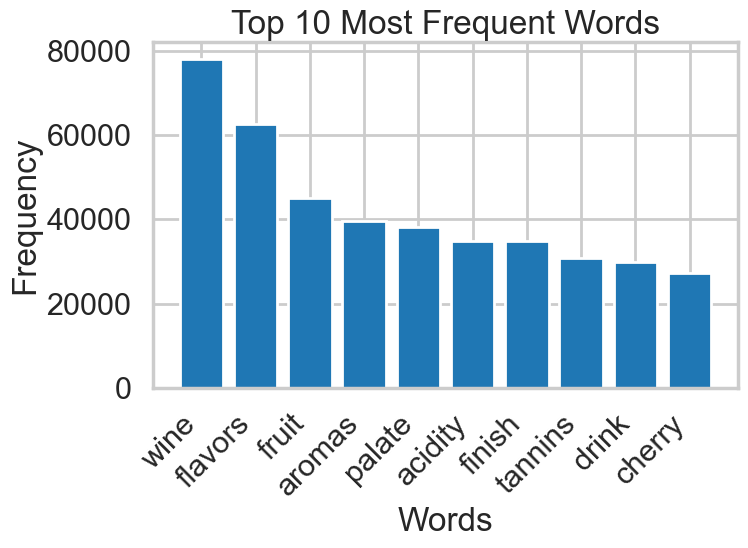

In [28]:
all_words = [word for text in descriptions['cleaned'] for word in word_tokenize(text)]

# Count word frequencies
word_counts = Counter(all_words)

# Extract top 10 most frequent words
top_10_words = word_counts.most_common(10)
word_labels = [word for word, _ in top_10_words]
word_counts = [count for _, count in top_10_words]

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(word_labels, word_counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

I think you probably guessed it, WINE, it's the most common descriptor of wine. I'm going to see whether there are any buzz words associated with particular countries or varietals. I'll first reorganize the components of the textual analysis into larger groupings.

In [29]:
# n_components should be set to the number of principal components you want (e.g., 2 for 2D visualization)
pca = PCA(n_components=2)

# 2. Fit PCA on the TF-IDF data and transform it.
pca_transformed = pca.fit_transform(tv_df)

# 3. Create a DataFrame from the PCA results.
pca_df = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2'])

# 4. Concatenate the PCA results back into the descriptions DataFrame.
descriptions = pd.concat([descriptions, pca_df], axis=1)

# 5. Now you can visualize or analyze the PCA components.
print(descriptions.head())

                                            original  \
0  Aromas include tropical fruit, broom, brimston...   
1  This is ripe and fruity, a wine that is smooth...   
2  Tart and snappy, the flavors of lime flesh and...   
3  Pineapple rind, lemon pith and orange blossom ...   
4  Much like the regular bottling from 2012, this...   

                                             cleaned  word_count  \
0  aromas include tropical fruit broom brimstone ...          24   
1  ripe fruity wine smooth still structured firm ...          37   
2  tart snappy flavors lime flesh rind dominate g...          28   
3  pineapple rind lemon pith orange blossom start...          33   
4  much like regular bottling comes across rather...          40   

   TFIDF_accented  TFIDF_accents  TFIDF_acidic  TFIDF_acidity  TFIDF_acids  \
0             0.0            0.0           0.0       0.151622          0.0   
1             0.0            0.0           0.0       0.156722          0.0   
2             0.0   

I'll add the country information back into our dataframe.

In [30]:
# Reset indices if needed to ensure proper alignment
descriptions = descriptions.reset_index(drop=True)
wine = wine.reset_index(drop=True)

# Concatenate after resetting the index
descriptions = pd.concat([descriptions, wine['country']], axis=1)

# Check the result
descriptions

original  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                                  cleaned  word_count  \
0       aromas include tropical fruit broom brimstone ...          24   
1       ripe fruity wine smooth still structured firm ...          37   
2       tart snappy flavors lime flesh rind dominate g...          28   
3       pineapple rind lemon pith orange blossom start...          33   
4       much like regular bottling comes across rather...          40   
...                                                   ...         ...   
129966  notes honeysuckle cantaloupe sweeten delicious...          34   
129967  citation given much decade bottle age prior re...          38   
129968  welldrained gravel soil gives wine crisp dry c...          42   
129969  dry style pinot gris crisp acidity also weight...          39   
129970  big rich offdry powered intense spiciness roun...          27   

        TFIDF_accented  TFIDF_accents  TFIDF_acidic  TFIDF_acidity  \
0                  0.0            0.0           0.0       0.151622   
1                  0.0            0.0           0.0       0.156722   
2                  0.0            0.0           0.0       0.231175   
3                  0.0            0.0           0.0       0.000000   
4                  0.0            0.0           0.0       0.000000   
...                ...            ...           ...            ...   
129966             0.0            0.0           0.0       0.191800   
129967             0.0            0.0           0.0       0.000000   
129968             0.0            0.0           0.0       0.000000   
129969             0.0            0.0           0.0       0.136644   
129970             0.0            0.0           0.0       0.000000   

        TFIDF_acids  TFIDF_add  TFIDF_adds  ...  TFIDF_years  TFIDF_yellow  \
0               0.0        0.0         0.0  ...     0.000000           0.0   
1               0.0        0.0         0.0  ...     0.000000           0.0   
2               0.0        0.0         0.0  ...     0.000000           0.0   
3               0.0        0.0         0.0  ...     0.000000           0.0   
4               0.0        0.0         0.0  ...     0.000000           0.0   
...             ...        ...         ...  ...          ...           ...   
129966          0.0        0.0         0.0  ...     0.000000           0.0   
129967          0.0        0.0         0.0  ...     0.000000           0.0   
129968          0.0        0.0         0.0  ...     0.290435           0.0   
129969          0.0        0.0         0.0  ...     0.000000           0.0   
129970          0.0        0.0         0.0  ...     0.000000           0.0   

        TFIDF_yet  TFIDF_young  TFIDF_zest  TFIDF_zesty  \
0        0.000000          0.0         0.0          0.0   
1        0.000000          0.0         0.0          0.0   
2        0.000000          0.0         0.0          0.0   
3        0.000000          0.0         0.0          0.0   
4        0.000000          0.0         0.0          0.0   
...           ...          ...         ...          ...   
129966   0.356052          0.0         0.0          0.0   
129967   0.000000          0.0         0.0          0.0   
129968   0.000000          0.0         0.0          0.0   
129969   0.000000          0.0         0.0          0.0   
129970   0.0

I'll now take the information about the country of origin for each wine and see whether there are any clusters already from the principal components of the textual indicators.

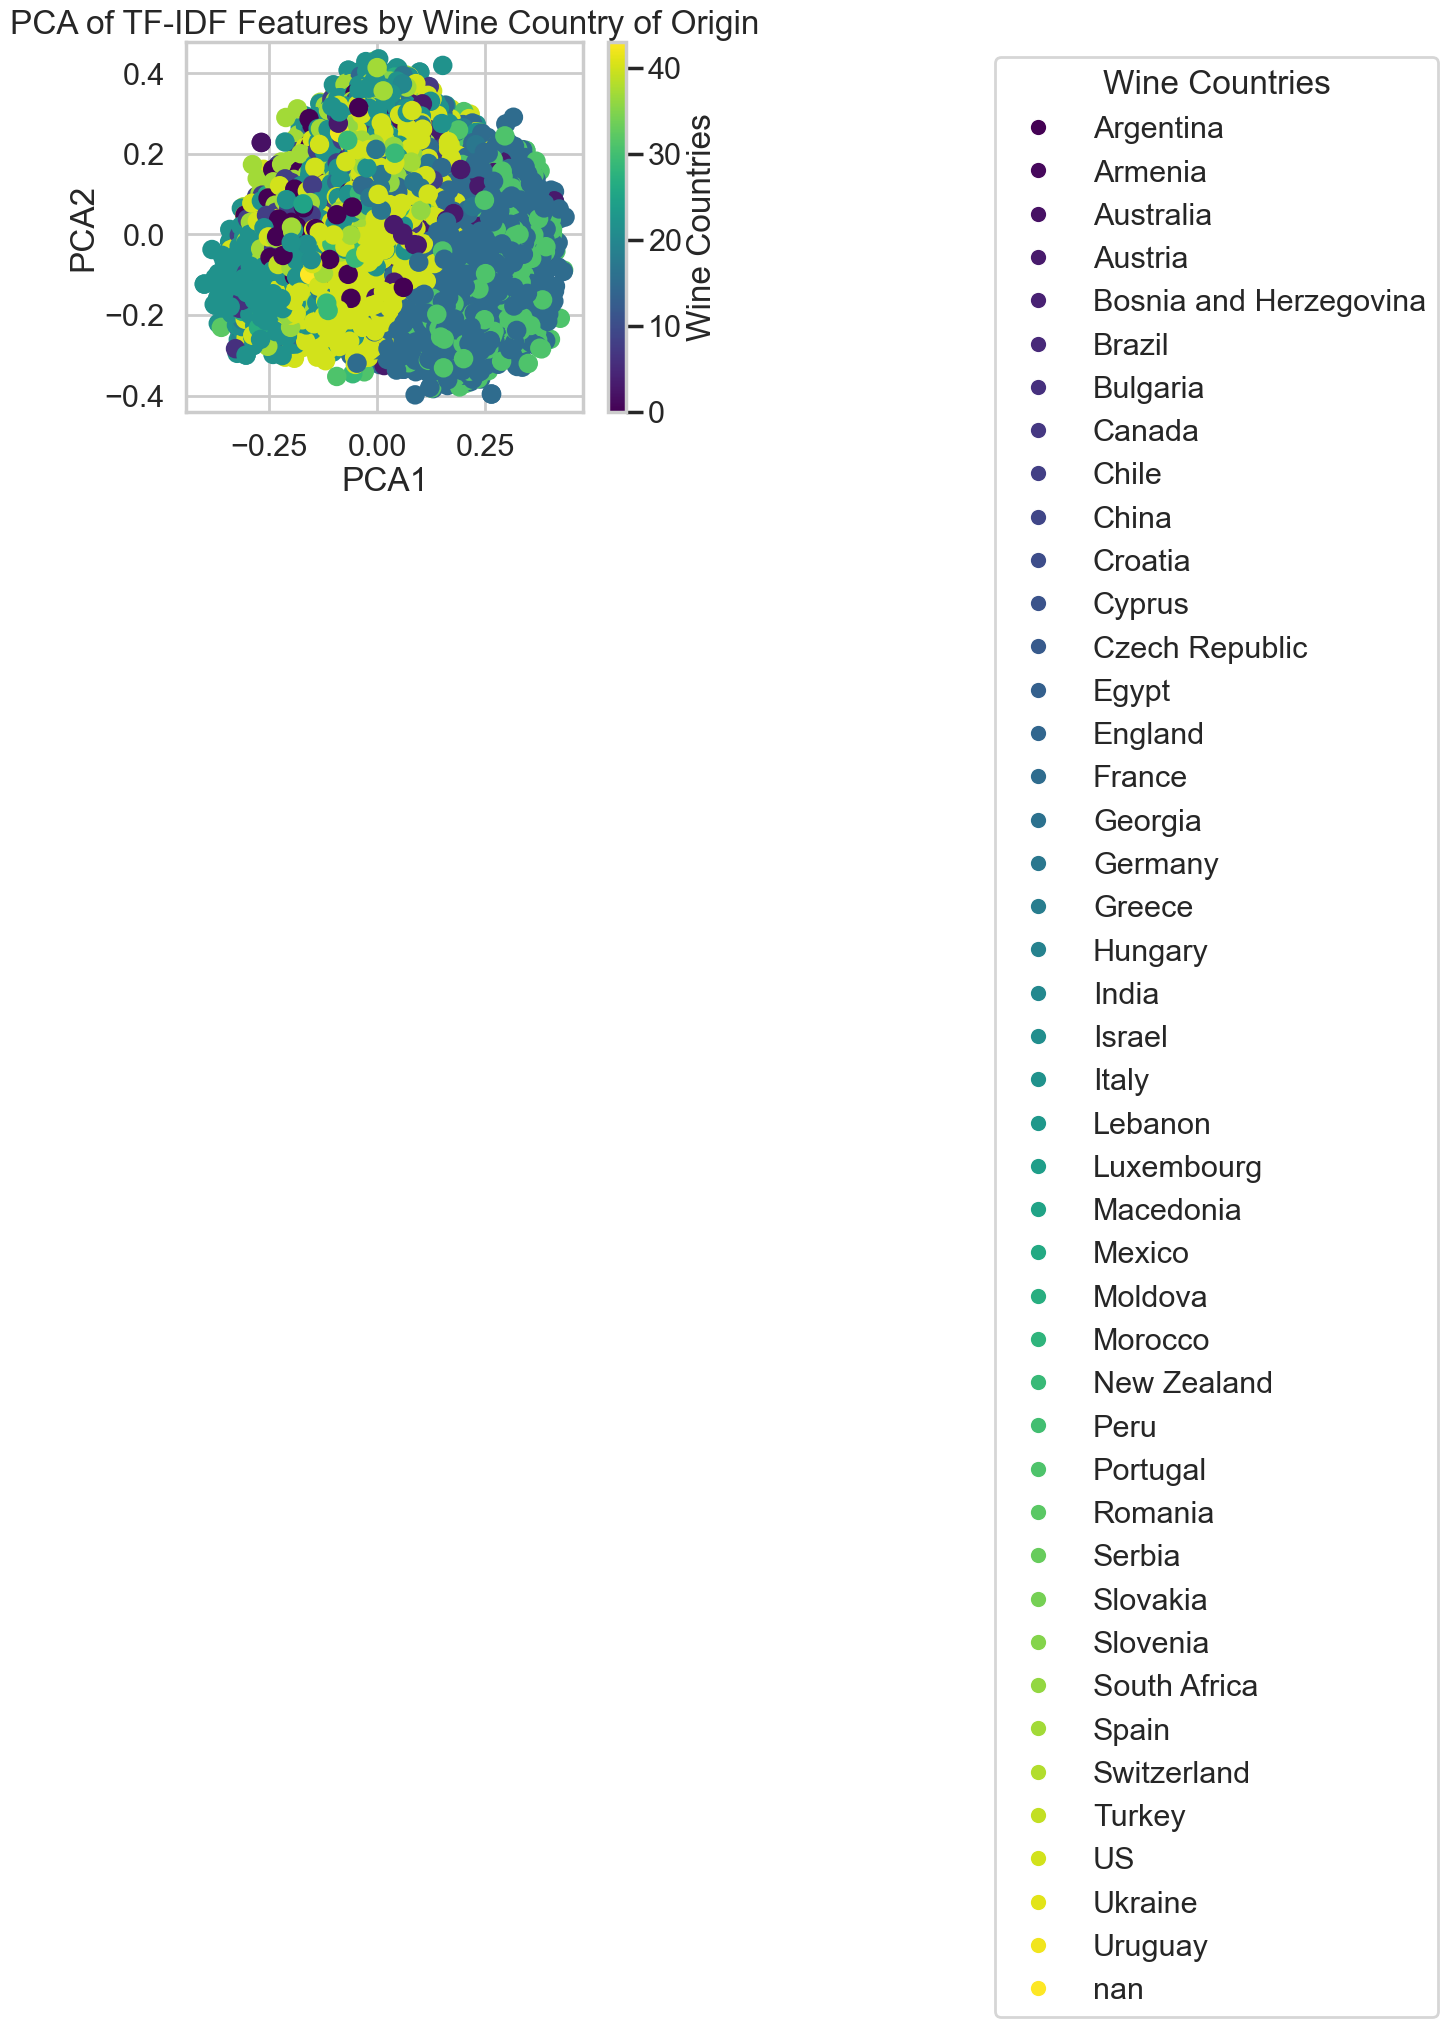

In [31]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode the wine variety as numerical labels
label_encoder = LabelEncoder()
descriptions['country_encoded'] = label_encoder.fit_transform(descriptions['country'])

# Create a scatter plot
scatter = plt.scatter(
    descriptions['PCA1'], 
    descriptions['PCA2'], 
    c=descriptions['country_encoded'], 
    cmap='viridis'
)

# Set labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of TF-IDF Features by Wine Country of Origin')

# Add colorbar for numerical encoding
cbar = plt.colorbar(scatter)
cbar.set_label('Wine Countries')

# Create a legend
# Get unique varieties and their corresponding encoded values
unique_countries = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
handles = [plt.Line2D([0], [0], marker='o', color='w', label=country,
                       markerfacecolor=scatter.cmap(scatter.norm(i))) for i, country in enumerate(unique_countries)]

plt.legend(handles=handles, title="Wine Countries", bbox_to_anchor=(2, 1), loc='upper left')

# Show the plot
plt.show()


It's a long list of countries. It looks like there are some color blobs, but it is still hard to tell whether there is any grouping of words associated with each country. I'll list out the words associated with each country to see whether any patterns arise. 

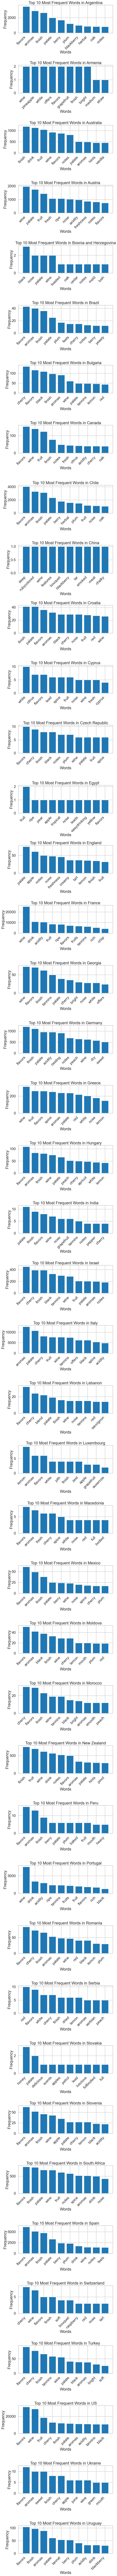

In [64]:
# Initialize a dictionary to store word counts by country
country_word_counts = {}

# Group by country and count word frequencies
for country, group in descriptions.groupby('country'):
    all_words = [word for text in group['cleaned'] for word in word_tokenize(text)]
    word_counts = Counter(all_words)
    country_word_counts[country] = word_counts

# Prepare data for plotting
top_words_by_country = {}
for country, counts in country_word_counts.items():
    top_10_words = counts.most_common(10)
    word_labels = [word for word, _ in top_10_words]
    word_counts = [count for _, count in top_10_words]
    top_words_by_country[country] = (word_labels, word_counts)

# Plotting
num_countries = len(top_words_by_country)
fig, axes = plt.subplots(num_countries, 1, figsize=(10, 5 * num_countries))

for ax, (country, (word_labels, word_counts)) in zip(axes, top_words_by_country.items()):
    ax.bar(word_labels, word_counts)
    ax.set_xlabel("Words")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Top 10 Most Frequent Words in {country}")
    ax.set_xticks(word_labels)
    ax.set_xticklabels(word_labels, rotation=45, ha="right")

plt.tight_layout()
plt.show()

It does look like there are certain words associated with each country. This makes sense, because we already know that certain varietals are grown in specific regions, but it's not that easy to search through each histogram, so I'll add it to a map. 

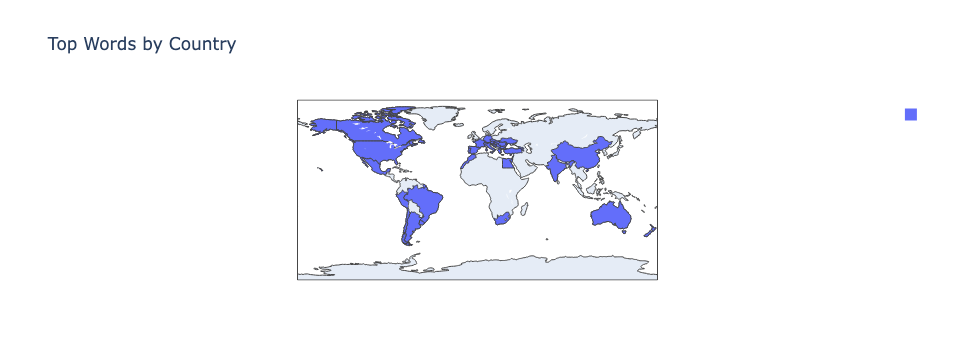

In [33]:
# Initialize a dictionary to store word counts by country
country_word_counts = {}

# Group by country and count word frequencies
for country, group in descriptions.groupby('country'):
    all_words = [word for text in group['cleaned'] for word in word_tokenize(text)]
    word_counts = Counter(all_words)
    country_word_counts[country] = word_counts

# Prepare data for Plotly
map_data = []
for country, counts in country_word_counts.items():
    top_10_words = counts.most_common(10)
    words = ", ".join([f"{word} ({count})" for word, count in top_10_words])
    map_data.append({'country': country, 'words': words})

# Convert to DataFrame
map_df = pd.DataFrame(map_data)

# Create a world map with hover text
fig = px.choropleth(
    map_df,
    locations='country',
    locationmode='country names',
    hover_name='country',
    hover_data={'country': False, 'words': True},
    title='Top Words by Country',
)

# Update the layout for better aesthetics
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>%{customdata[0]}<extra></extra>',
                  customdata=map_df[['words']].values)
fig.show()

In [34]:
#I'll just save this map.

# Initialize a dictionary to store word counts by country
country_word_counts = {}

# Group by country and count word frequencies
for country, group in descriptions.groupby('country'):
    all_words = [word for text in group['cleaned'] for word in word_tokenize(text)]
    word_counts = Counter(all_words)
    country_word_counts[country] = word_counts

# Prepare data for Plotly
map_data = []
for country, counts in country_word_counts.items():
    top_10_words = counts.most_common(10)
    words = ", ".join([f"{word} ({count})" for word, count in top_10_words])
    map_data.append({'country': country, 'words': words})

# Convert to DataFrame
map_df = pd.DataFrame(map_data)

# Create a world map with hover text
fig = px.choropleth(
    map_df,
    locations='country',
    locationmode='country names',
    hover_name='country',
    hover_data={'country': False, 'words': True},
    title='Top Words by Country',
)

# Update the layout for better aesthetics
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>%{customdata[0]}<extra></extra>',
                  customdata=map_df[['words']].values)

# Save the figure as a PNG file
fig.write_image("top_words_by_country.png")  # Specify the desired file name and format


Great! I'll now take a look to see whether any of these buzz words map onto particular varietals to see whether there are any indicators by taste.  And to see what they might be.

In [35]:
# Reset indices if needed to ensure proper alignment
descriptions = descriptions.reset_index(drop=True)
wine = wine.reset_index(drop=True)

# Concatenate after resetting the index
descriptions = pd.concat([descriptions, wine['variety']], axis=1)

# Check the result
descriptions

original  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                                  cleaned  word_count  \
0       aromas include tropical fruit broom brimstone ...          24   
1       ripe fruity wine smooth still structured firm ...          37   
2       tart snappy flavors lime flesh rind dominate g...          28   
3       pineapple rind lemon pith orange blossom start...          33   
4       much like regular bottling comes across rather...          40   
...                                                   ...         ...   
129966  notes honeysuckle cantaloupe sweeten delicious...          34   
129967  citation given much decade bottle age prior re...          38   
129968  welldrained gravel soil gives wine crisp dry c...          42   
129969  dry style pinot gris crisp acidity also weight...          39   
129970  big rich offdry powered intense spiciness roun...          27   

        TFIDF_accented  TFIDF_accents  TFIDF_acidic  TFIDF_acidity  \
0                  0.0            0.0           0.0       0.151622   
1                  0.0            0.0           0.0       0.156722   
2                  0.0            0.0           0.0       0.231175   
3                  0.0            0.0           0.0       0.000000   
4                  0.0            0.0           0.0       0.000000   
...                ...            ...           ...            ...   
129966             0.0            0.0           0.0       0.191800   
129967             0.0            0.0           0.0       0.000000   
129968             0.0            0.0           0.0       0.000000   
129969             0.0            0.0           0.0       0.136644   
129970             0.0            0.0           0.0       0.000000   

        TFIDF_acids  TFIDF_add  TFIDF_adds  ...  TFIDF_yet  TFIDF_young  \
0               0.0        0.0         0.0  ...   0.000000          0.0   
1               0.0        0.0         0.0  ...   0.000000          0.0   
2               0.0        0.0         0.0  ...   0.000000          0.0   
3               0.0        0.0         0.0  ...   0.000000          0.0   
4               0.0        0.0         0.0  ...   0.000000          0.0   
...             ...        ...         ...  ...        ...          ...   
129966          0.0        0.0         0.0  ...   0.356052          0.0   
129967          0.0        0.0         0.0  ...   0.000000          0.0   
129968          0.0        0.0         0.0  ...   0.000000          0.0   
129969          0.0        0.0         0.0  ...   0.000000          0.0   
129970          0.0        0.0         0.0  ...   0.000000          0.0   

        TFIDF_zest  TFIDF_zesty  \
0              0.0          0.0   
1              0.0          0.0   
2              0.0          0.0   
3              0.0          0.0   
4              0.0          0.0   
...            ...          ...   
129966         0.0          0.0   
129967         0.0          0.0   
129968         0.0          0.0   
129969         0.0          0.0   
129970         0.0          0.0   

                                                     tags      PCA1      PCA2  \
0       [(aromas, NNS), (include, VBP), (tropical, JJ)... -0.100309  0.180688   
1       [(ripe, JJ), (fruity, NN), (wine, NN), (smooth...  0.188648 -0.227560   
2       [(tart, NN), (snappy, JJ)

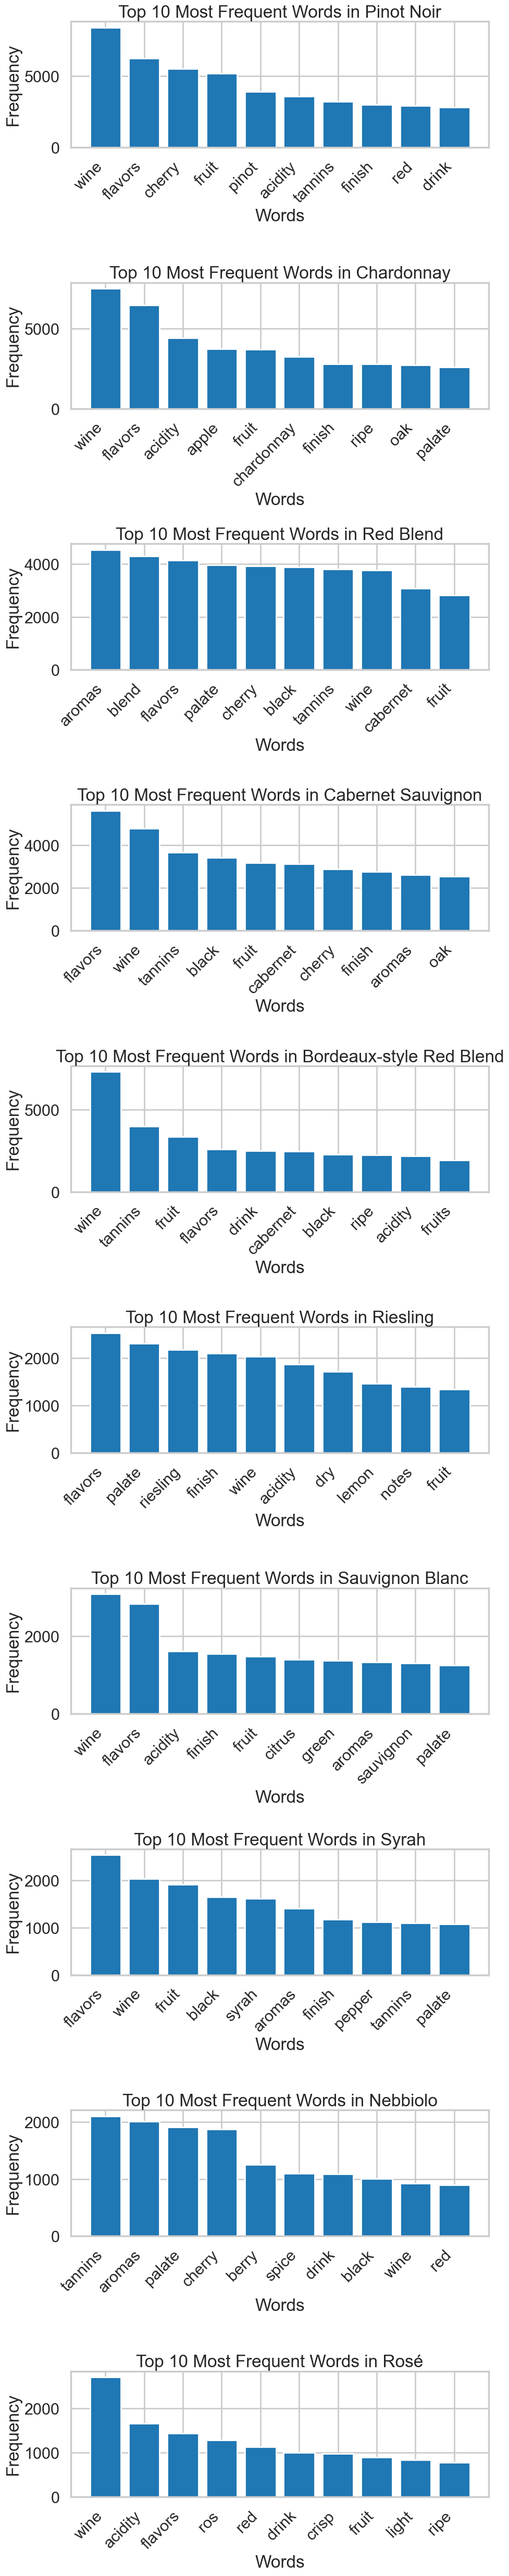

In [60]:
# Initialize a dictionary to store word counts by varietal
variety_word_counts = {}

# Group by varietal and count word frequencies
for varietal, group in descriptions.groupby('variety'):
    all_words = [word for text in group['cleaned'] for word in word_tokenize(text)]
    word_counts = Counter(all_words)
    variety_word_counts[varietal] = word_counts

# Prepare data for plotting: only top 10 varietals
top_varietals = sorted(variety_word_counts.keys(), key=lambda v: sum(variety_word_counts[v].values()), reverse=True)[:10]

top_words_by_varietal = {}
for varietal in top_varietals:
    counts = variety_word_counts[varietal]
    top_10_words = counts.most_common(10)
    word_labels = [word for word, _ in top_10_words]
    word_counts = [count for _, count in top_10_words]
    top_words_by_varietal[varietal] = (word_labels, word_counts)

# Plotting
num_varietals = len(top_words_by_varietal)
fig, axes = plt.subplots(num_varietals, 1, figsize=(10, 5 * num_varietals))

for ax, (varietal, (word_labels, word_counts)) in zip(axes, top_words_by_varietal.items()):
    ax.bar(word_labels, word_counts)
    ax.set_xlabel("Words")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Top 10 Most Frequent Words in {varietal}")
    ax.set_xticks(word_labels)
    ax.set_xticklabels(word_labels, rotation=45, ha="right")

plt.tight_layout()
plt.show()

Aside from words like 'flavors, wine, red, white' I am starting to see certain words are prevalent with each of the top ten wines from the list. Pinot Noir was described as 'cherry', Chardonnay as 'apple', Cabernet Sauvignon had 'black fruits' as did Syrah. Lighter wines like Sauvignon Blanc and Reisling were described for their 'lemon', 'citrus', 'acidity', Italian Nebbiolo had 'tannin' at the top of the list and our final rose was 'crisp' and 'light' amongst other adjectives. There are plenty of other features of wine to explore but it does seem like certain words are used to describe specific features of wine, however it is not a given that we can work backwards from descriptions to the taste or composition of the wine to figure out what each wine is, or even whether the somm could have guessed it right!